<a href="https://colab.research.google.com/github/purvadanait/AIML-Pract/blob/main/NNwFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np

In [41]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)

print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


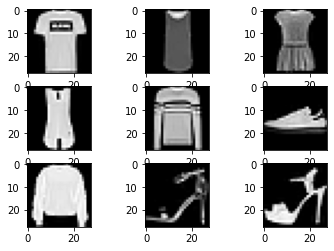

In [42]:
for i in range(1, 10):

    plt.subplot(3, 3, i)

    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [43]:
trainX = np.expand_dims(trainX, -1)

testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [44]:
def model_arch():

    models = Sequential()


    models.add(Conv2D(64, (5, 5),

                      padding="same",

                      activation="relu", 

                      input_shape=(28, 28, 1)))


    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Conv2D(128, (5, 5), padding="same",

                      activation="relu"))

     

    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Conv2D(256, (5, 5), padding="same", 

                      activation="relu"))

     

    models.add(MaxPooling2D(pool_size=(2, 2)))


    models.add(Flatten())

    models.add(Dense(256, activation="relu"))


    models.add(Dense(10, activation="softmax"))

    return models

In [45]:
model = model_arch()
 

model.compile(optimizer=Adam(learning_rate=1e-3),

              loss='sparse_categorical_crossentropy',

              metrics=['sparse_categorical_accuracy'])
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 256)       

In [46]:
history = model.fit(

    trainX.astype(np.float32), trainy.astype(np.float32),

    epochs=10,

    steps_per_epoch=10,

    validation_split=0.33
)

Epoch 1/10
10/10 [==============================] - 6s 577ms/step - loss: 22.8605 - sparse_categorical_accuracy: 0.1783 - val_loss: 2.3750 - val_sparse_categorical_accuracy: 0.2425
Epoch 2/10
10/10 [==============================] - 5s 553ms/step - loss: 1.9850 - sparse_categorical_accuracy: 0.3263 - val_loss: 1.4519 - val_sparse_categorical_accuracy: 0.5679
Epoch 3/10
10/10 [==============================] - 6s 638ms/step - loss: 1.0897 - sparse_categorical_accuracy: 0.6497 - val_loss: 0.7421 - val_sparse_categorical_accuracy: 0.7390
Epoch 4/10
10/10 [==============================] - 6s 647ms/step - loss: 0.6639 - sparse_categorical_accuracy: 0.7615 - val_loss: 0.5889 - val_sparse_categorical_accuracy: 0.7810
Epoch 5/10
10/10 [==============================] - 5s 566ms/step - loss: 0.5472 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.8069
Epoch 6/10
10/10 [==============================] - 6s 647ms/step - loss: 0.4901 - sparse_categoric

In [47]:
model.save_weights('./model.h5', overwrite=True)

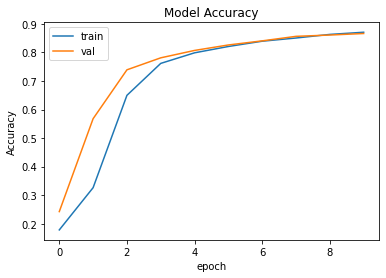

In [48]:
plt.plot(history.history['sparse_categorical_accuracy'])

plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

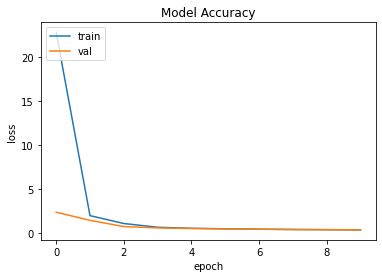

In [49]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

ankle_boots


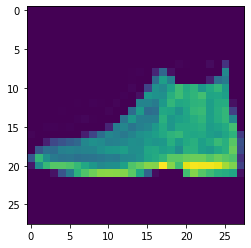

In [52]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',

          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

predictions = model.predict(testX[:1])

label = labels[np.argmax(predictions)]
 

print(label)

plt.imshow(np.squeeze(testX[0]))
plt.show()